In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# determine speed up and efficiency columns
l = []
for i in range(0, df.shape[0]):
    l.append(df.iloc[i%30][" total time"] / df.iloc[i][" total time"])
df["Speed up"] = l
df["Efficiency"] = l / df["threads"]

In [6]:
# determine speed up for only parallel time
l = []
for i in range(0, df.shape[0]):
    l.append(df.iloc[i%30][" parallel time"] / df.iloc[i][" parallel time"])
df["Speed up Scalable"] = l

In [9]:
# find mean and se
df_mean = df.groupby([" name dataset", "threads"], as_index=False).mean()
df_se = df.groupby([" name dataset", "threads"], as_index=False).sem()

In [10]:
# use logarithmic scale for threads
df_mean["threads"] = np.log2(df_mean["threads"]).astype(int)
df_se["threads"] = np.log2(df_se["threads"]).astype(int)

In [7]:
#Amdahl's law

for name in set(df_mean[" name dataset"]):
    print(f"{name} : {1 / float(df_mean.loc[(df_mean['threads'] == 0) & (df_mean[' name dataset'] == name)][' non parallel time'] / df_mean.loc[(df_mean['threads'] == 0) & (df_mean[' name dataset'] == name)][' total time']):.3f}")

 as-skitter.txt : 6.194
 com-dblp.ungraph.txt : 1.408
 com-youtube.ungraph.txt : 2.844
 facebook_combined.txt : 2.247
 com-amazon.ungraph.txt : 1.333
 com-orkut.ungraph.txt : 4.686


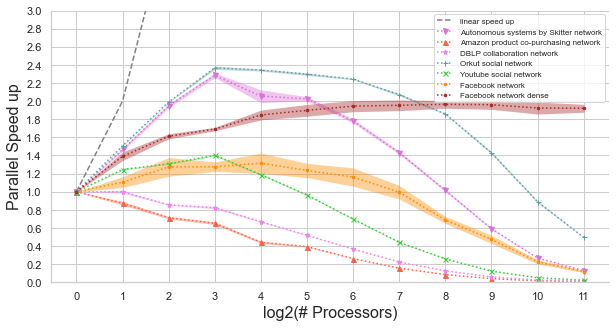

In [13]:
# plot speed up
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="whitegrid", rc=custom_params)
plt.figure(figsize=(10, 5))

plt.xticks(sorted(list(set(df_mean["threads"]))))
plt.yticks(np.arange(0, 3.1, 0.2))
plt.ylim(top=3) 
plt.xlabel("log2(# Processors)", fontsize=16)
plt.ylabel("Parallel Speed up", fontsize=16)

plt.plot(np.arange(0, 12), 2**np.arange(0, 12), linestyle='--', color="gray", ms=5, label="linear speed up")

plt.plot(df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Speed up"],
         linestyle=':', marker="v", color="orchid", ms=5, label="Autonomous systems by Skitter network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Speed up"] - df_se.loc[df_se[' name dataset'] == " as-skitter.txt"]["Speed up"],
                 df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Speed up"] + df_se.loc[df_se[' name dataset'] == " as-skitter.txt"]["Speed up"],
    alpha=.4, edgecolor='orchid', facecolor='orchid',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up"],
         linestyle=':', marker='^', color="tomato", ms=5, label="Amazon product co-purchasing network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up"] - df_se.loc[df_se[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up"],
                 df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up"] + df_se.loc[df_se[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up"],
    alpha=.4, edgecolor='tomato', facecolor='tomato',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up"],
         linestyle=':', marker='*', color="violet", ms=5, label="DBLP collaboration network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up"] - df_se.loc[df_se[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up"],
                 df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up"] + df_se.loc[df_se[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up"],
    alpha=.4, edgecolor='violet', facecolor='violet',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up"],
         linestyle=':', marker='+', color="cadetblue", ms=5, label="Orkut social network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up"] - df_se.loc[df_se[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up"],
                 df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up"] + df_se.loc[df_se[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up"],
    alpha=.4, edgecolor='darkorange', facecolor='cadetblue',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up"],
         linestyle=':', marker='x', color="limegreen", ms=5, label="Youtube social network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up"] - df_se.loc[df_se[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up"],
                 df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up"] + df_se.loc[df_se[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up"],
    alpha=.4, edgecolor='limegreen', facecolor='limegreen',
    linewidth=0)
                 
plt.plot(df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Speed up"],
         linestyle=':', marker='.', color="darkorange", ms=5, label="Facebook network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Speed up"] - df_se.loc[df_se[' name dataset'] == " facebook_combined.txt"]["Speed up"],
                 df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Speed up"] + df_se.loc[df_se[' name dataset'] == " facebook_combined.txt"]["Speed up"],
    alpha=.4, edgecolor='darkorange', facecolor='darkorange',
    linewidth=0)

plt.legend(fontsize=8)
#plt.savefig('speed up.png', format='png', dpi=1200)

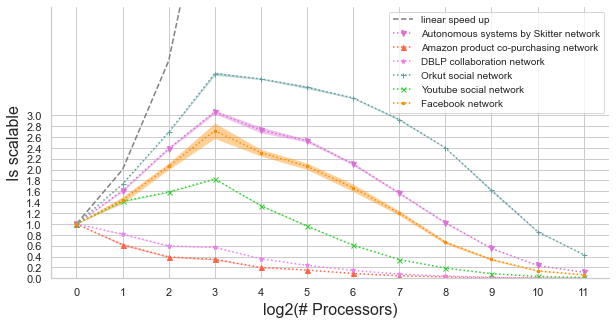

In [10]:
# plot speed up
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="whitegrid", rc=custom_params)
plt.figure(figsize=(10, 5))

plt.xticks(sorted(list(set(df_mean["threads"]))))
plt.yticks(np.arange(0, 3.1, 0.2))
plt.ylim(top=5) 
plt.xlabel("log2(# Processors)", fontsize=16)
plt.ylabel("Is scalable", fontsize=16)

plt.plot(np.arange(0, 12), 2**np.arange(0, 12), linestyle='--', color="gray", ms=5, label="linear speed up")

plt.plot(df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Speed up Scalable"],
         linestyle=':', marker="v", color="orchid", ms=5, label="Autonomous systems by Skitter network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Speed up Scalable"] - df_se.loc[df_se[' name dataset'] == " as-skitter.txt"]["Speed up Scalable"],
                 df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Speed up Scalable"] + df_se.loc[df_se[' name dataset'] == " as-skitter.txt"]["Speed up Scalable"],
    alpha=.4, edgecolor='orchid', facecolor='orchid',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up Scalable"],
         linestyle=':', marker='^', color="tomato", ms=5, label="Amazon product co-purchasing network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up Scalable"] - df_se.loc[df_se[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up Scalable"],
                 df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up Scalable"] + df_se.loc[df_se[' name dataset'] == " com-amazon.ungraph.txt"]["Speed up Scalable"],
    alpha=.4, edgecolor='tomato', facecolor='tomato',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up Scalable"],
         linestyle=':', marker='*', color="violet", ms=5, label="DBLP collaboration network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up Scalable"] - df_se.loc[df_se[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up Scalable"],
                 df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up Scalable"] + df_se.loc[df_se[' name dataset'] == " com-dblp.ungraph.txt"]["Speed up Scalable"],
    alpha=.4, edgecolor='violet', facecolor='violet',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up Scalable"],
         linestyle=':', marker='+', color="cadetblue", ms=5, label="Orkut social network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up Scalable"] - df_se.loc[df_se[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up Scalable"],
                 df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up Scalable"] + df_se.loc[df_se[' name dataset'] == " com-orkut.ungraph.txt"]["Speed up Scalable"],
    alpha=.4, edgecolor='darkorange', facecolor='cadetblue',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up Scalable"],
         linestyle=':', marker='x', color="limegreen", ms=5, label="Youtube social network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up Scalable"] - df_se.loc[df_se[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up Scalable"],
                 df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up Scalable"] + df_se.loc[df_se[' name dataset'] == " com-youtube.ungraph.txt"]["Speed up Scalable"],
    alpha=.4, edgecolor='limegreen', facecolor='limegreen',
    linewidth=0)
                 
plt.plot(df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Speed up Scalable"],
         linestyle=':', marker='.', color="darkorange", ms=5, label="Facebook network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Speed up Scalable"] - df_se.loc[df_se[' name dataset'] == " facebook_combined.txt"]["Speed up Scalable"],
                 df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Speed up Scalable"] + df_se.loc[df_se[' name dataset'] == " facebook_combined.txt"]["Speed up Scalable"],
    alpha=.4, edgecolor='darkorange', facecolor='darkorange',
    linewidth=0)

plt.legend(fontsize=10)
#plt.savefig('scalable.png', format='png', dpi=1200)

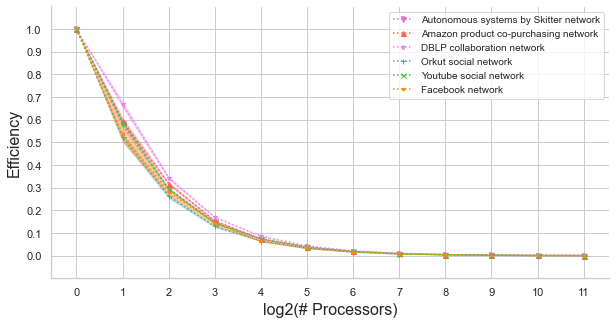

In [40]:
# plot efficiency
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="whitegrid", rc=custom_params)
plt.figure(figsize=(10, 5))

plt.xticks(sorted(list(set(df_mean["threads"]))))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(top=1.1, bottom=-0.1) 
plt.xlabel("log2(# Processors)", fontsize=16)
plt.ylabel("Efficiency", fontsize=16)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Efficiency"],
         linestyle=':', marker="v", color="orchid", ms=5, label="Autonomous systems by Skitter network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Efficiency"] - df_se.loc[df_se[' name dataset'] == " as-skitter.txt"]["Efficiency"],
                 df_mean.loc[df_mean[' name dataset'] == " as-skitter.txt"]["Efficiency"] + df_se.loc[df_se[' name dataset'] == " as-skitter.txt"]["Efficiency"],
    alpha=.4, edgecolor='orchid', facecolor='orchid',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Efficiency"],
         linestyle=':', marker='^', color="tomato", ms=5, label="Amazon product co-purchasing network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Efficiency"] - df_se.loc[df_se[' name dataset'] == " com-amazon.ungraph.txt"]["Efficiency"],
                 df_mean.loc[df_mean[' name dataset'] == " com-amazon.ungraph.txt"]["Efficiency"] + df_se.loc[df_se[' name dataset'] == " com-amazon.ungraph.txt"]["Efficiency"],
    alpha=.4, edgecolor='tomato', facecolor='tomato',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Efficiency"],
         linestyle=':', marker='*', color="violet", ms=5, label="DBLP collaboration network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Efficiency"] - df_se.loc[df_se[' name dataset'] == " com-dblp.ungraph.txt"]["Efficiency"],
                 df_mean.loc[df_mean[' name dataset'] == " com-dblp.ungraph.txt"]["Efficiency"] + df_se.loc[df_se[' name dataset'] == " com-dblp.ungraph.txt"]["Efficiency"],
    alpha=.4, edgecolor='violet', facecolor='violet',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Efficiency"],
         linestyle=':', marker='+', color="cadetblue", ms=5, label="Orkut social network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Efficiency"] - df_se.loc[df_se[' name dataset'] == " com-orkut.ungraph.txt"]["Efficiency"],
                 df_mean.loc[df_mean[' name dataset'] == " com-orkut.ungraph.txt"]["Efficiency"] + df_se.loc[df_se[' name dataset'] == " com-orkut.ungraph.txt"]["Efficiency"],
    alpha=.4, edgecolor='darkorange', facecolor='cadetblue',
    linewidth=0)

plt.plot(df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Efficiency"],
         linestyle=':', marker='x', color="limegreen", ms=5, label="Youtube social network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Efficiency"] - df_se.loc[df_se[' name dataset'] == " com-youtube.ungraph.txt"]["Efficiency"],
                 df_mean.loc[df_mean[' name dataset'] == " com-youtube.ungraph.txt"]["Efficiency"] + df_se.loc[df_se[' name dataset'] == " com-youtube.ungraph.txt"]["Efficiency"],
    alpha=.4, edgecolor='limegreen', facecolor='limegreen',
    linewidth=0)
                 
plt.plot(df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["threads"],
         df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Efficiency"],
         linestyle=':', marker='.', color="darkorange", ms=5, label="Facebook network")
plt.fill_between(df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["threads"],
                 df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Efficiency"] - df_se.loc[df_se[' name dataset'] == " facebook_combined.txt"]["Efficiency"],
                 df_mean.loc[df_mean[' name dataset'] == " facebook_combined.txt"]["Efficiency"] + df_se.loc[df_se[' name dataset'] == " facebook_combined.txt"]["Efficiency"],
    alpha=.4, edgecolor='darkorange', facecolor='darkorange',
    linewidth=0)

plt.legend( fontsize=10)
plt.savefig('efficiency.png', format='png', dpi=1200)